In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from scipy import stats as ss

import datetime
#from tqdm import tqdm

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('train.csv')
df.head()

,RefId,IsGoodBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,1,12-07-2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,1,12-07-2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,1,12-07-2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,1,12-07-2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,1,12-07-2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [3]:
df.IsGoodBuy.unique()

array([1, 0], dtype=int64)

In [4]:
df.isnull().sum()

RefId                                    0
IsGoodBuy                                0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [5]:
df['VehicleAge'].isnull().sum()

0

In [6]:
df.corr()

,RefId,IsGoodBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,-0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsGoodBuy,-0.023973,1.000000,0.158886,-0.167164,0.044620,-0.082560,0.109252,0.102954,0.087418,0.083665,0.109112,0.104020,0.103914,0.100245,0.061488,-0.005796,0.099911,0.003697,-0.052319
VehYear,0.010580,0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,-0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,-0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


# Missing values

In [7]:
df.describe()

,RefId,IsGoodBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.877012,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,1.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,1.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,1.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [8]:
df.columns

Index(['RefId', 'IsGoodBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

# Cramers V

In [9]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [10]:
cramers_v(df['Make'],df['WheelType'])

0.22980045891988643

In [11]:
df.set_index('Make',inplace=True)

In [12]:
df.SubModel.fillna(df.groupby('Make')['SubModel'].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [13]:
df.Color.fillna(df.groupby('Make')['Color'].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [14]:
df.Transmission.fillna(df.groupby('Make')['Transmission'].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [15]:
df.Size.fillna(df.groupby('Make')['Size'].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [16]:
df.Nationality.fillna(df.groupby('Make')['Nationality'].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [17]:
df.WheelType.fillna(df.groupby('Make')['WheelType'].agg(lambda x:x.value_counts().index[0]),inplace=True)

In [18]:
df.SubModel.isnull().sum()

0

In [19]:
df['MMRCurrentAuctionAveragePrice'].fillna(df.groupby('Make')['MMRCurrentAuctionAveragePrice'].transform('mean'),inplace=True)

In [20]:
df['MMRCurrentAuctionAveragePrice'].isnull().sum()

0

# Outliers

In [21]:
df['warranty_log'] = np.log(df['WarrantyCost'])

In [22]:
df.reset_index(inplace=True)

# Label Encoding

In [23]:
le_sub = LabelEncoder()
df.SubModel = le_sub.fit_transform(df.SubModel)

In [24]:
le_col = LabelEncoder()
df.Color = le_col.fit_transform(df.Color)

In [25]:
le_trans = LabelEncoder()
df.Transmission = le_trans.fit_transform(df.Transmission)

In [26]:
le_nat = LabelEncoder()
df.Nationality = le_nat.fit_transform(df['Nationality'])

In [27]:
le_auc = LabelEncoder()
df.Auction = le_auc.fit_transform(df.Auction)
#df_test.Auction = le_auc.fit_transform(df_test.Auction)

In [28]:
le_make = LabelEncoder()
df.Make = le_make.fit_transform(df.Make)
#df_test.Make = le_make.fit_transform(df_test.Make)

In [29]:
le_mod = LabelEncoder()
df.Model = le_mod.fit_transform(df.Model)
#df_test.Model = le_mod.fit_transform(df_test.Model)

In [30]:
le_state = LabelEncoder()
df.VNST = le_state.fit_transform(df.VNST)
#df_test.Model = le_mod.fit_transform(df_test.Model)

In [31]:
le_W = LabelEncoder()
df.WheelType = le_W.fit_transform(df.WheelType)
#df_test.WheelType = le_WT.fit_transform(df_test.WheelType)

#  MODEL INITIALISATION

In [32]:
cl_dtc = DecisionTreeClassifier(max_depth=10)


clf_rfc = RandomForestClassifier()


clf_xgb = XGBClassifier()


# X and y split 

In [33]:
X = np.array(df[['Auction','Make','Model','Color','Transmission','WheelType','Nationality','VNST','VehOdo','MMRCurrentAuctionAveragePrice','VehBCost','warranty_log']])
y = np.array(df['IsGoodBuy'])

In [34]:
df.Color.unique()

array([12, 14,  7, 13,  1,  4,  6,  2,  0, 11,  9,  5,  3, 15,  8, 10],
      dtype=int64)

In [35]:
X_train , X_test , y_train , y_test = model_selection.train_test_split(X,y,test_size = 0.2)

# SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
se = SMOTE()

In [37]:
X_smt, y_smt = se.fit_sample(X_train, y_train)

# Plot confusion matrix

In [38]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MODEL EVALUATION

# Decision Tree

In [39]:
'''****SMOTE DATA****'''

cl_dtc.fit(X_smt,y_smt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

AUC: 0.596


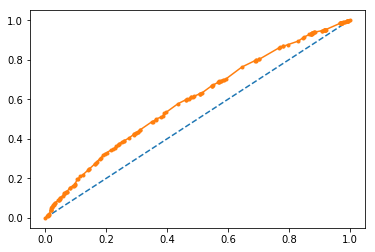

In [40]:
#AUC OF SMOTE

from matplotlib import pyplot
probs = cl_dtc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

***CONFUSION MATRIX FOR DECISION TREE SMOTE***
[[  148  1596]
 [  645 12208]]


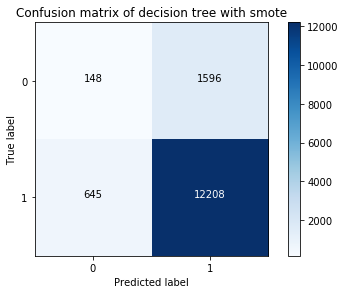

In [41]:
print('***CONFUSION MATRIX FOR DECISION TREE SMOTE***')
cm = confusion_matrix(y_test, cl_dtc.predict(X_test))

print(cm)


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix of decision tree with smote')
plt.show()

# RANDOM FOREST

In [42]:
clf_rfc.fit(X_smt,y_smt)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

AUC: 0.618


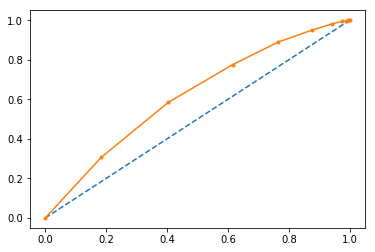

In [43]:
#AUC of Random forest smote

from matplotlib import pyplot
probs = clf_rfc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

***CONFUSION MATRIX FOR RANDOM FOREST SMOTE***
[[  217  1527]
 [  646 12207]]


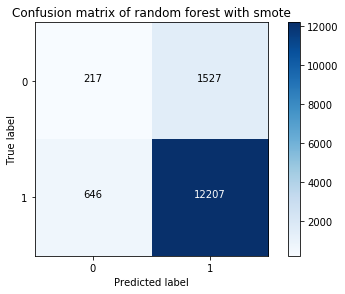

In [44]:
print('***CONFUSION MATRIX FOR RANDOM FOREST SMOTE***')
cm = confusion_matrix(y_test, clf_rfc.predict(X_test))

print(cm)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix of random forest with smote')
plt.show()

# XGBoost

In [45]:
clf_xgb.fit(X_smt,y_smt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [46]:
X_xgtest_smt, y_xgtest_smt = se.fit_sample(X_test, y_test)

AUC: 0.508


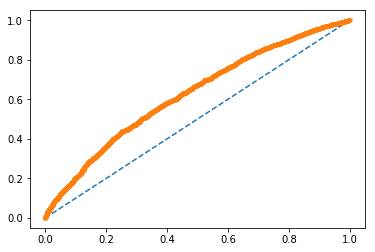

In [47]:
probs = clf_xgb.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, clf_xgb.predict(X_test))
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

[[   43  1701]
 [  119 12734]]


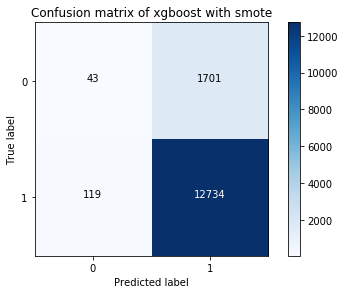

In [48]:
cm = confusion_matrix(y_test, clf_xgb.predict(X_test))

print(cm)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix of xgboost with smote')
plt.show()

# Naive Bayes

In [49]:
nb = MultinomialNB()

nb.fit(X_smt, y_smt)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

AUC: 0.626


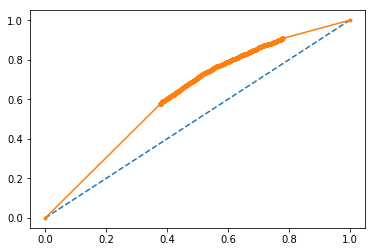

In [50]:
#AUC OF NAIVE BAYES SMOTE

probs = nb.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

***CONFUSION MATRIX OF NAIVE BAYES SMOTE***
[[1064  680]
 [5243 7610]]


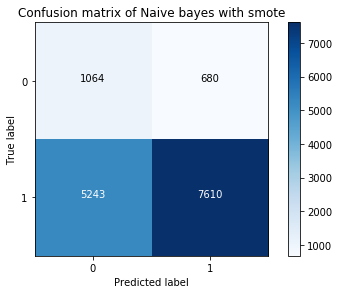

In [51]:
print('***CONFUSION MATRIX OF NAIVE BAYES SMOTE***')
cm = confusion_matrix(y_test, nb.predict(X_test))

print(cm)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix of Naive bayes with smote')
plt.show()

In [52]:
from tkinter import *
#Window set
root = Tk()
root.title(" Smart Vehicle Bid Assistant")
root.geometry("1080x600")

theLabel = Label(root , text = "Welcome",bg="grey",fg="black",width = "10",height="1",font = ("bold",20))
theLabel.grid(row = 2,column = 1)
theLabel.pack()

#feature gathering

label1 = Label(root,text = "Enter the details:",bg="white",fg="black")
label1.place(x=50,y=70)
label2 = Label(root,text = "*Note:  ",bg="white",fg="black")
label2.place(x=50,y=450)
label3 = Label(root,text = "All the prices are to be given in US Dollars(USD)",fg="black")
label3.place(x=100,y=450)
#labels
attr1 = Label(root,text = "Auction place")
attr2 = Label(root,text = "Wheel type")
attr3 = Label(root,text = "Brand")
attr4 = Label(root,text = "Model")
attr5 = Label(root,text = "Warranty price")
attr6 = Label(root,text = "Kms travelled")
attr7 = Label(root,text = "Current Retail price")
attr8 = Label(root,text = "Auction Prrice")
attr9 = Label(root,text = "Color")
attr10 = Label(root,text = "Transmission")
attr11 = Label(root,text = "Nationality")
attr12 = Label(root,text = "State")

#positioning labels
attr1.place(x=50,y=140)
attr2.place(x=50,y=210)
attr3.place(x=50,y=280)
attr4.place(x=50,y=350)
attr5.place(x=400,y=140)
attr6.place(x=400,y=210)
attr7.place(x=400,y=280)
attr8.place(x=400,y=350)
attr9.place(x=800,y=140)
attr10.place(x=800,y=210)
attr11.place(x=800,y=280)
attr12.place(x=800,y=350)

#varibles for input

var1 = StringVar()
var1.set("Select")
var2 = StringVar()
var2.set("Select")
var3 = StringVar()
var3.set("Select")
var4= StringVar()
var4.set("Select")
var5 = IntVar()
var6 = IntVar()
var7 = DoubleVar()
var8 = DoubleVar()
var9 = StringVar()
var9.set("Select")
var10 = StringVar()
var10.set("Select")
var11 = StringVar()
var11.set("Select")
var12 = StringVar()
var12.set("Select")

#creating list for company and models
Auction = ['ADESA', 'MANHEIM', 'OTHER']
Company = ['ACURA','BUICK','CADILLAC','CHEVROLET','CHRYSLER','DODGE','FORD','GMC','HONDA',
           'HUMMER','HYUNDAI','INFINITI','ISUZU','JEEP', 'KIA',
           'LEXUS','LINCOLN','MAZDA','MERCURY','MINI','MITSUBISHI',   'NISSAN','OLDSMOBILE'
           ,'PLYMOUTH','PONTIAC',
           'SATURN','SCION','SUBARU','SUZUKI','TOYOTA','TOYOTA SCION','VOLKSWAGEN','VOLVO']
#list for models
ACURA_model = ['TL','TSX','MDX 4WD 3.5L V6 SOHC', '3.2 TL', 'MDX 4WD', '3.2 CL 3.2L V 6 NA S', 'RSX', '3.2 TL 3.2L V6 EFI', '3.2 TL 3.2L V6 FI DO', '3.2 CL', 'MDX 4WD 3.5L V6 EFI']
BUICK_model = ['PARK AVENUE','RENDEZVOUS FWD', 'REGAL' ,'TERRAZA FWD V6',
 'RENDEZVOUS FWD 3.4L' ,'RENDEZVOUS AWD', 'CENTURY V6',
 'LACROSSE 3.8L V6 SFI', 'LE SABRE' ,'CENTURY V6 3.1L V6 S', 'LACROSSE',
 'LE SABRE 3.8L V6 MFI', 'PARK AVENUE 3.8L V6' ,'RENDEZVOUS AWD 3.4L',
 'RAINIER RWD V6', 'LACROSSE 3.6L V6 SFI', 'TERRAZA FWD V6 3.5L',
 'REGAL 3.8L V6 MFI SC', 'LE SABRE Unspecified' ,'RENDEZVOUS FWD 3.5L',
 'RAINIER AWD V6', 'RAINIER RWD V6 4.2L', 'RAINIER AWD V6 4.2L',
 'LE SABRE 3.8L V6 MPI', 'REGAL 3.8L V6 MFI' ,'LUCERNE V6',
 'REGAL 3.8L V6 SFI', 'RAINIER RWD V8', 'RAINIER AWD V8',
 'RENDEZVOUS AWD 3.5L', 'LUCERNE V6 3.8L V6 S' ,'RAINIER RWD V8 5.3L']
CADILLAC_model = ['CTS', 'SRX AWD V6' ,'SRX AWD V8 4.6L V8 S' ,'CTS 3.2L V6 SFI','CTS 3.6L V6 SFI' ,'SRX AWD V6 3.6L V6 S', 'STS V6', 'ESCALADE 2WD']
CHEVROLET_model = ['CAVALIER 4C','TRAILBLAZER 2WD 6C', 'IMPALA', 'MONTE CARLO',
 'VENTURE FWD V6', 'HHR', 'SUBURBAN 1500 2WD', 'AVALANCHE 1500 2WD V',
 'IMPALA V6', 'TAHOE 2WD', 'COBALT', 'TRAILBLAZER EXT 2WD', 'TRACKER 2WD V6',
 'MALIBU V6' ,'EQUINOX FWD V6', 'UPLANDER FWD V6', '1500 SILVERADO PICKU',
 'MALIBU MAXX V6', 'COLORADO PICKUP 2WD', 'MALIBU 4C', 'AVEO',
 'IMPALA 3.5L V6 SFI', 'COBALT 2.2L I4 MPI', 'UPLANDER FWD V6 3.9L',
 'VENTURE AWD V6', 'TRACKER 4WD V6 2.5L', 'MALIBU V6 3.5L V6 SF',
 'IMPALA 3.4L V6 SFI', 'MONTE CARLO 3.5L V6' ,'AVEO 1.6L I4 EFI',
 'MALIBU 4C 2.2L I4 MP', 'MALIBU MAXX V6 3.5L', 'TRAILBLAZER 4WD 6C 4',
 'CAVALIER 4C 2.2L I4' ,'HHR 2.2L I4 MPI' ,'EQUINOX AWD V6 3.4L',
 'VENTURE FWD V6 3.4L', 'TAHOE 4WD 4.8L V8 SF' ,'MALIBU V6 3.1L V6 SF',
 'MONTE CARLO 3.4L V6', 'EQUINOX AWD V6', 'TRAILBLAZER EXT 4WD',
 'TRAILBLAZER 4WD 6C' ,'S10 PICKUP 2WD 4C' ,'AVALANCHE 1500 4WD V',
 'TAHOE 4WD', 'TRAILBLAZER 2WD 6C 4', 'IMPALA V6 3.5L V6 SF',
 'COBALT 2.2L I4 MPI /','UPLANDER FWD V6 3.5L' ,'AVEO 1.6L I-4 EFI DO',
 'AVEO 1.6L I4 EFI / M', 'TAHOE 2WD 4.8L V8 SF', 'EQUINOX FWD V6 3.4L',
 'MALIBU 4C 2.2L I4 MF', 'IMPALA 3.9L V6 SFI', 'HHR 2.4L I-4 MPI',
 'IMPALA V6 3.5L V6 MP', 'IMPALA 3.8L V6 SFI', 'TRACKER 2WD 4C 2.0L',
 'TRACKER 2WD 4C', 'HHR 2.2L I4 MPI / SF', 'MALIBU V6 3.5L V6 MF',
 'HHR 2.2L I-4 MPI DOH', 'TAHOE 2WD 5.3L V8 SF' ,'TAHOE 4WD 5.3L V8 SF',
 'SUBURBAN 1500 4WD', '2500HD SILVERADO PIC', 'SUBURBAN 1500 2WD 5.',
 'COBALT 2.2L I-4 MPI', 'S10 PICKUP 2WD 4C 2.' ,'S10 PICKUP 4WD V6 4.',
 'COLORADO PICKUP 4WD', 'AVEO 1.6L I-4 MPI DO' ,'SUBURBAN 1500 4WD 5.',
 'MONTE CARLO 3.9L V6', 'IMPALA 3.5L V6 SFI F', 'UPLANDER AWD V6',
 'MONTE CARLO 3.8L V6', 'S10 PICKUP 2WD V6' ,'AVEO 1.6L I4 DOHC',
 'CAVALIER 4C 2.2L I-4', 'CAVALIER 4C 2.4L I-4', 'CAMARO V6',
 'IMPALA 3.8L V6 MFI', 'UPLANDER AWD V6 3.5L' ,'IMPALA 3.8L V6 MFI S',
 'TRACKER 4WD 4C', 'S10 PICKUP 2WD V6 MF', 'HHR 2.4L I4 MPI',
 'TRACKER 4WD V6', 'TRAILBLAZER 2WD V8' ,'HHR 2.4L I4 MPI / SF',
 'CAMARO V6 3.8L V6 MF', 'IMPALA V6 3.9L V6 SF', 'SUBURBAN 2500 4WD 6.',
 'SUBURBAN 2500 4WD', 'IMPALA 5.3L V8 SFI', '1500HD SILVERADO PIC',
 'S10 PICKUP 4WD V6 MF', 'MALIBU 4C 2.4L I4 MP', 'VENTURE FWD V6 3.5L',
 'VENTURE AWD V6 3.4L', 'TRACKER 2WD V6 2.5L', '2500 SILVERADO PICKU',
 'TRACKER 4WD 4C 2.0L', 'PRIZM' 'AVALANCHE 2500 2WD V',
 'PRIZM 1.8L I-4 SFI D', 'CAVALIER 4C 2.2L I 4', 'S10 PICKUP 2WD V6 4.',
 'TRAILBLAZER 4WD V8','IMPALA 3.5L V6 MPI /', 'MALIBU HYBRID', 'UPLANDER',
 'MALIBU 4C 2.2L I-4 M', 'S10 PICKUP 4WD V6']
CHRYSLER_model = ['VOYAGER FWD V6','300', 'PACIFICA FWD' ,'SEBRING V6' ,'PT CRUISER',
 'TOWN & COUNTRY FWD V', 'SEBRING 4C' ,'TOWN & COUNTRY 2WD V',
 'PACIFICA FWD 3.5L V6', '300 2.7L V6 MPI' ,'SEBRING 4C 2.4L I4 E',
 'SEBRING 4C 2.4L I4 S', 'SEBRING V6 2.7L V6 M', 'PT CRUISER 2.4L I4 M',
 'PT CRUISER 2.4L I4 S', 'PT CRUISER 2.4L I-4', 'CONCORDE 3.5L V6 MPI',
 'PACIFICA AWD 3.5L V6', 'PACIFICA AWD' ,'PACIFICA FWD 3.8L V6',
 '300 3.5L V6 MPI', '300M', 'VOYAGER FWD 4C', 'CONCORDE',
 '300 3.5L V6 MPI / SM', '300 3.5L / 6.0L V12', 'PACIFICA AWD 4.0L V6',
 'PACIFICA FWD 4.0L V6', 'SEBRING V6 3.0L V6 M', 'ASPEN 2WD V8',
 'SEBRING 4C 2.4L I-4', 'SEBRING V6 MFI V6 2.', 'PT CRUISER 2.4L I4 D',
 '300M 3.5L V6 MPI', 'VOYAGER FWD 4C 2.4L', 'VOYAGER FWD V6 3.3L', '300C',
 '300C 5.7L V8 SFI / S', 'SEBRING 4C 2.4L I4 M', '300C 5.7L V8 SFI', 'LHS',
 'TOWN & COUNTRY AWD V', 'CONCORDE 2.7L V6 SFI', 'CROSSFIRE 3.2L V6 MP',
 '300M 3.5L V6 MPI HO', 'SEBRING V6 2.4L I4 S', 'Pacifica',
 'CONCORDE 3.2L V6 EFI', 'SEBRING V6 2.7L V6 S']
DODGE_model = ['1500 RAM PICKUP 2WD', 'STRATUS V6', 'NEON', 'CARAVAN GRAND FWD V6',
 'DURANGO 4WD V8', 'CALIBER' ,'DURANGO 2WD V8', 'DAKOTA PICKUP 2WD V6',
 'DURANGO 2WD V6', 'MAGNUM V6', 'STRATUS 4C', 'CARAVAN FWD V6', 'CHARGER V6',
 'AVENGER 4C', 'JOURNEY FWD 4C', 'AVENGER V6', 'CHARGER',
 'CHARGER V6 2.7L V6 M', 'MAGNUM V6 2.7L V6 MP', 'STRATUS 4C 2.4L I4 S',
 'STRATUS 4C 2.4L I4 M', 'DURANGO 4WD V8 5.7L', 'CARAVAN FWD 4C',
 '1500 RAM PICKUP 4WD', 'NEON 2.0L I-4 SFI SO', 'CHARGER V6 3.5L V6 E',
 'MAGNUM V6 3.5L V6 MP', 'CHARGER 3.5L V6 EFI', 'CARAVAN FWD 4C 2.4L',
 'CHARGER 2.7L V6 MPI', 'DAKOTA PICKUP 2WD V8', 'NITRO 2WD V6',
 'DURANGO 2WD V8 4.7L', 'CALIBER 2.0L I4 SFI', 'AVENGER 4C 2.4L I4 S',
 'DURANGO 4WD V8 4.7L', 'NEON 2.0L I4 SFI', '2500 RAM PICKUP 4WD',
 'CARAVAN FWD V6 3.3L' ,'INTREPID 3.5L V6 MPI' ,'STRATUS V6 2.7L V6 M',
 'MAGNUM V8' ,'DURANGO 2WD V6 3.7L' ,'NITRO 4WD V6 3.7L V6' ,'AVENGER',
 'DURANGO 2WD V8 5.7L', '2500 RAM PICKUP 2WD', 'DAKOTA PICKUP 4WD V6',
 'NITRO 4WD V6', 'NEON 2.0L I4 SFI / S', 'DURANGO 4WD V8 SEFI',
 'MAGNUM V8 5.7L V8 SF', 'NITRO 2WD V6 3.7L V6', 'STRATUS V6 3.0L V6 E',
 'CARAVAN GRAND AWD V6', 'DURANGO 4WD V8 5.9L', 'STRATUS 4C 2.4L I-4',
 'INTREPID', 'STRATUS V6 2.4L I-4', 'CARAVAN', 'INTREPID 2.7L V6 SFI',
 'DURANGO 2WD V8 5.9L', 'DAKOTA PICKUP 2WD 4C', 'INTREPID 3.5L V6 EFI',
 'CARAVAN SE', 'AVENGER V6 Unspecifi', 'DAKOTA PICKUP 4WD V8',
 'CALIBER 1.8L I4 SFI', 'MAGNUM V6 MFI V6 3.5', 'JOURNEY FWD V6',
 'AVENGER V6 2.7L V6 M', 'STRATUS V6 2.7L V6 S', 'DURANGO 4WD V8 MFI V']
FORD_model = ['FOCUS','TAURUS','FIVE HUNDRED','F150 PICKUP 2WD V6','EXPLORER 2WD V6', 'MUSTANG V6','WINDSTAR FWD V6','FREESTAR FWD V6','FUSION 4C', 'EXPEDITION 2WD V8','FREESTYLE 2WD V6','F150 PICKUP 2WD V8', 'FREESTYLE FWD V6','ESCAPE 4WD V6','RANGER PICKUP 2WD V6', 'EXPLORER 4WD V6','ESCAPE 2WD V6','ESCAPE 2WD 4C','F150 PICKUP 4WD V8', 'FUSION V6','EXPEDITION 4WD V8 5.','MUSTANG V6 4.0L V6 E', 'TAURUS 3.0L V6 EFI S','FIVE HUNDRED 3.0L V6','WINDSTAR FWD V6 3.8L', 'EXPLORER 4WD V6 4.0L','FOCUS 2.0L I-4 EFI D','ESCAPE 2WD V6 3.0L V', 'FOCUS 2.0L I4 SFI','FREESTYLE 2WD V6 3.0','FREESTYLE AWD V6', 'EXPEDITION 4WD V8','EXPLORER 2WD V8','TAURUS 3.0L V6 EFI', 'MUSTANG V6 3.8L V6 E','EXPLORER 2WD V6 4.0L','TAURUS 3.0L V6 EFI /', 'RANGER PICKUP 2WD 4C','CROWN VICTORIA','F150 PICKUP 2WD V8 5', 'FREESTAR FWD V6 3.9L','F150 PICKUP 2WD V8 4','FUSION 4C 2.3L I4 EF', 'FREESTYLE FWD V6 3.0','EXPLORER AWD V6','MUSTANG V6 3.9L V6 E', 'FREESTYLE AWD V6 3.0','ESCAPE 4WD V6 3.0L V','EXPEDITION 2WD V8 5.', 'FOCUS 2.0L I4 SPI','FOCUS 2.0L I-4 SFI S','ESCAPE 2WD 4C 2.0L I', 'TAURUS 3.0L V6 EFI F','ESCAPE 2WD 4C 2.3L I','FOCUS 2.3L I-4 DOHC', 'F150 PICKUP 2WD V6 4','MUSTANG V6 Unspecifi','TAURUS X FWD V6', 'EXPLORER 4WD V8','TAURUS 3.0L V6 SFI','FREESTAR FWD V6 4.2L', 'EXPEDITION 2WD V8 4.','FOCUS 2.0L I-4 SFI D','EXPEDITION 4WD V8 4.', 'FOCUS 2.0L I4 EFI','FOCUS 2.0L I4 MFI /','EXPLORER 2WD V8 4.6L', 'TAURUS 3.0L V6 EFI D','FOCUS 2.3L I4 DOHC','ESCORT 2.0L I-4 EFI', 'FOCUS 2.0L I4 SFI /','ESCORT 2.0L I4 EFI','F150 PICKUP 4WD V6', 'MUSTANG V8','ESCAPE 4WD 4C 2.3L I','RANGER PICKUP 4WD V6', 'ESCAPE 4WD 4C','TAURUS X FWD V6 3.5L','FUSION V6 3.0L V6 EF', 'EXPLORER AWD V6 4.0L','MUSTANG V8 4.6L V8 E','F150 PICKUP 4WD V8 5', 'FOCUS Multiple Engin','EXPLORER 4WD V8 4.6L','ESCORT 4-FI-2.0L', 'F150 PICKUP 4WD V8 4','CROWN VICTORIA 4.6L','TAURUS 3.5L V6 24V /', 'ESCAPE','FOCUS 2.0L I-4 SPI','F250 PICKUP 4WD V8','F250 PICKUP 2WD V8', 'EDGE FWD V6','FOCUS 2.3L I4 SFI','FOCUS 2.3L I4 MFI','EDGE AWD V6', 'ESCORT','ESCORT 2.0L I-4 SPI','F250 PICKUP 2WD V8 5', 'EDGE AWD V6 3.5L V6','TAURUS X AWD V6','EXCURSION 4WD V8 5.4']
GMC_model = ['1500 SIERRA PICKUP 2','ENVOY XL 2WD 6C','ENVOY XL 4WD 6C','ENVOY 2WD 6C', 'ENVOY 4WD 6C','ENVOY 2WD 6C 4.2L I-','ENVOY 2WD 6C 4.2L I6', 'YUKON XL 1500 4WD','SONOMA PICKUP 2WD V6','1500 SIERRA PICKUP 4', 'ENVOY XL 2WD V8','ENVOY 4WD 6C 4.2L I6','YUKON XL 1500 2WD 5.', 'ENVOY XL 4WD V8','YUKON XL 1500 2WD','ENVOY XL 2WD 6C 4.2L', 'CANYON PICKUP 2WD I5','ENVOY XL 2WD V8 5.3L','YUKON 4WD V8 4.8L V8', 'YUKON 2WD V8 4.8L V8','CANYON PICKUP 4WD I5','YUKON 2WD V8', 'YUKON AWD V8','ENVOY 4WD V8 5.3L V8','SONOMA PICKUP 2WD 4C', 'YUKON 4WD V8 5.3L V8','YUKON 4WD V8','SIERRA 1500', 'CANYON PICKUP 2WD 4C','YUKON 2WD V8 5.3L V8','ENVOY 4WD 6C 4.2L I-', 'ENVOY XL 4WD V8 5.3L','ENVOY XL 4WD 6C 4.2L','YUKON XL 1500 4WD 5.', '1500HD SIERRA PICKUP','2500HD SIERRA PICKUP','YUKON XL 1500 AWD 6.', 'ENVOY 2WD V8']
HONDA_model = ['ELEMENT 2WD','ACCORD 4C','ACCORD V6 3.0L V6 EF','ACCORD V6','CIVIC', 'ACCORD 4C 2.4L I4 MP','ACCORD 4C 2.4L I-4 M','ELEMENT 2WD 2.4L I4', 'ELEMENT 4WD','ELEMENT 4WD 2.4L I4','ODYSSEY','PILOT 3.5L V6 MPI', 'CR-V 4WD','CR-V 4WD 2.0L I-4 MP','PILOT','ACCORD 4C 2.3L I-4 E', 'CIVIC MFI I-4 1.7L S','ACCORD 4C MFI I-4 2.','FIT', 'CIVIC 1.7L I-4 MPI S','CR-V 4WD 2.4L I4 MPI','CIVIC 1.7L I4 MFI /', 'CR-V 2WD','CIVIC 1.7L I4 MPI','ELEMENT 2WD 2.4L I-4', 'ACCORD 4C 2.3L I-4 S','ACCORD 4C 2.3L I4 EF','CR-V 2WD 2.0L I 4 NA', 'ODYSSEY 3.5L V6 MPI']
HUMMER_model = ['H3 3.5L I5 MPI / SFI']
HYUNDAI_model = ['SONATA V6','ACCENT','ELANTRA','TUCSON 2WD 4C','SONATA 4C', 'SANTA FE 2WD V6','SONATA V6 2.7L V6 MP','ELANTRA 2.0L I4 MPI', 'ELANTRA MFI I-4 2.0L','SANTA FE 4WD V6 2.7L','SONATA V6 3.3L V6 MP', 'SONATA 4C 2.4L I4 MP','ACCENT 1.6L I4 MPI','TIBURON', 'SONATA 4C MFI I-4 2.','SANTA FE 2WD V6 2.7L','XG 350 3.5L V6 EFI /', 'SANTA FE 2WD 4C','XG 350','SANTA FE 4WD V6','ACCENT MFI I-4 1.6L', 'SANTA FE 2WD 4C 2.4L','AZERA 3.8L V6 MPI','TUCSON 2WD V6', 'TUCSON 4WD 4C','TUCSON 4WD V6','TUCSON 2WD 4C 2.0L I', 'SANTA FE 2WD V6 3.5L','AZERA','TIBURON MFI I-4 2.0L', 'XG 350 3.5L V6 EFI D','ACCENT 1.6L I-4 MPI','TUCSON 2WD V6 2.7L V', 'TUCSON 4WD V6 2.7L V','TUCSON 2WD V6 MFI V6','TIBURON 2.7L V6 MPI', 'XG 300','TIBURON MFI V6 2.7L','ACCENT 1.5L I-4 EFI', 'SONATA 4C 2.4L I-4 M','ENTOURAGE','SONATA V6 MFI V6 2.7', 'XG 300 Unspecified','SANTA FE 4WD V6 Unsp']
INFINITI_model = ['QX4 4WD V6','G35','I35 3.5L V6 MPI DOHC','G20 2.0L I4 EFI','FX35 AWD', 'QX4 2WD V6 3.5L V6 M','I30','G35 3.5L V6 MPI','M35','G35 3.5L V6 DOHC', 'I35','G35 3.5L V6 SMPI','M45 4.5L V8 MPI','M35 3.5L V6 MPI', 'M45 4.5L V8 MPI / SF']
ISUZU_model = ['ASCENDER 2WD 6C 4.2L','ASCENDER 2WD 6C','AXIOM 2WD V6 3.5L V6', 'I-280 PICKUP 2WD 4C','ASCENDER 4WD 6C','ASCENDER 4WD 6C 4.2L', 'RODEO 2WD 4C MFI I-4','AXIOM 4WD V6 3.5L V6','ASCENDER 2WD V8 5.3L', 'I-370 PICKUP 2WD 5C','RODEO 2WD V6','I-290 PICKUP 2WD 4C','AXIOM 2WD V6']
JEEP_model = ['LIBERTY 2WD V6','LIBERTY 2WD 4C','GRAND CHEROKEE 2WD V','PATRIOT 4WD 4C', 'LIBERTY 4WD V6 3.7L','LIBERTY 4WD V6','GRAND CHEROKEE 4WD V', 'LIBERTY 2WD V6 3.7L','PATRIOT 2WD 4C','GRAND CHEROKEE 4WD 6', 'GRAND CHEROKEE 2WD 6','PATRIOT FWD 4C','COMMANDER 2WD V8', 'COMMANDER 2WD V6 3.7','COMMANDER 2WD V6','COMMANDER 4WD V8', 'COMMANDER 4WD V8 4.7','COMMANDER 4WD V6','COMPASS 4WD 4C', 'COMPASS 2WD 4C 2.4L','COMPASS FWD 4C','COMMANDER 4WD V6 3.7', 'CHEROKEE 2WD 6C 4.0L','COMPASS 4WD 4C 2.4L','COMMANDER 2WD V8 4.7', 'WRANGLER 6C','CHEROKEE 2WD 6C','CHEROKEE 4WD 6C','PATRIOT 2WD 4C 2.4L', 'WRANGLER 6C 4.0L I-6','LIBERTY 2WD 4C 2.4L','COMMANDER','COMPASS 2WD 4C', 'LIBERTY 4WD 4C','CHEROKEE 4WD 6C 4.0L','COMPASS 2WD 4C 2.0L', 'PATRIOT 2WD 4C 2.0L']
KIA_model = ['SPECTRA','OPTIMA 4C','AMANTI','RIO','SORENTO 4WD','SORENTO 4WD 3.5L V6', 'SPORTAGE 2WD 4C 2.0L','OPTIMA 4C 2.4L I4 MP','SPECTRA 2.0L I4 EFI', 'RIO 1.6L I4 MPI','RONDO V6','SPORTAGE 2WD 4C','SORENTO 2WD 3.5L V6', 'RONDO V6 2.7L V6 DI','SPORTAGE 2WD Multipl','SPECTRA 1.8L I4 EFI', 'OPTIMA V6','SORENTO 2WD','SEDONA','RIO MFI I-4 1.6L DOH', 'AMANTI 3.5L V6 MPI','RIO 5','OPTIMA V6 MFI V6 2.7', 'SPECTRA 5 2.0L I4 EF','SPORTAGE 2WD 4C 2.7L','RONDO 4C','OPTIMA', 'OPTIMA V6 2.7L V6 MP','SPORTAGE 2WD V6 2.7L','SEDONA 3.8L V6 MPI', 'SPECTRA 2.0L I-4 EFI','SPECTRA 5','SPORTAGE 4WD 2.0L I4', 'SPORTAGE 4WD V6','SPORTAGE 2WD V6','SPORTAGE 2WD 4C MFI', 'SORENTO 2WD 3.8L V6','MAGENTIS 4C','RONDO V6 2.7L V6 MPI', 'RIO 5 1.6L I4 MPI','RONDO 4C 2.4L I4 DI','RONDO 4C 2.4L I4 MPI', 'SEDONA 3.5L V6 EFI','OPTIMA 4C 2.4L I 4 N','SPECTRA 6-230/250-1V']
LEXUS_model = ['GS450H','GS300','ES300 3.0L V6 EFI','ES330','GS300 3.0L I6 EFI','ES300', 'RX400H AWD','ES300 3.0L V6 EFI DO','RX300 2WD 3.0L V6 EF','RX300 2WD', 'IS300','GX470 4WD','RX330 FWD']
LINCOLN_model = ['TOWN CAR 4.6L V8 EFI','TOWN CAR','CONTINENTAL','NAVIGATOR 4WD V8', 'NAVIGATOR 2WD V8 5.4','CONTINENTAL 4.6L V8','ZEPHYR','AVIATOR 2WD V8', 'NAVIGATOR 2WD V8','LS V6','AVIATOR 2WD V8 4.6L','LS V8', 'LS V6 3.0L V6 EFI','ZEPHYR 3.0L V6 SFI','LS V6 3.0L V6 EFI DO', 'NAVIGATOR 4WD V8 5.4','AVIATOR AWD V8','LS V8 3.9L V8 EFI']
MAZDA_model = ['MAZDA3','MAZDA5','MAZDA6','TRIBUTE 2WD 4C','TRIBUTE 2WD V6', 'MAZDA6 2.3L I4 MFI /','TRIBUTE 4WD V6','MPV 2WD V6','PROTEGE', '626 V6 2.5L V6 EFI D','TRIBUTE 4WD V6 3.0L','MAZDA3 2.0L I-4 MPI', 'PROTEGE 5 2.0L I-4 M','MAZDA6 2.3L I4 MPI','MAZDA6 3.0L V6 MFI /', 'MPV 2WD V6 3.0L V6 M','MIATA MX-5','TRIBUTE 2WD 4C 2.3L', 'PROTEGE 2.0L I4 EFI','MAZDA3 2.0L I4 MFI /','TRIBUTE 2WD V6 3.0L', 'B3000 PICKUP 2WD V6','MAZDA3 2.3L I4 MFI /','MAZDA3 2.0L I4 MPI', 'MAZDA6 3.0L V6 MPI','MPV 2WD V6 MFI V6 3.','TRIBUTE 4WD 4C', 'MAZDA3 2.3L I4 MPI','626 V6','PROTEGE MFI I-4 1.6L', '626 4C 2.0L I-4 EFI','PROTEGE 2.0L I-4 EFI','MAZDA6 3.0L V6 MPI D', 'MAZDA5 2.3L I4 MFI /','B2300 PICKUP 2WD 4C','626 4C','PROTEGE 5', 'B3000 PICKUP 4WD V6','MPV 2WD V6 MFI V6 2.','MAZDA6 2.3L I-4 MPI', 'MAZDA3 2.3L I-4 MPI','CX-7 FWD 4C 2.3L I4','626 4C 2.0L I4 EFI', 'CX-7 AWD 4C','CX-7 FWD 4C']
MERCURY_model = ['SABLE','SABLE 3.0L V6 EFI','MARINER 2WD V6 3.0L','MILAN V6','MILAN 4C', 'MONTEGO','MILAN V6 3.0L V6 EFI','MOUNTAINEER 2WD V6', 'MOUNTAINEER AWD V6 4','MARINER 2WD V6','GRAND MARQUIS','MARINER 4WD V6', 'SABLE 3.0L V6 EFI DO','SABLE 3.0L V6 2V /EF','MONTEGO 3.0L V6 EFI', 'MOUNTAINEER AWD V8','MOUNTAINEER AWD V6','MONTEREY', 'MARINER 4WD V6 3.0L','MOUNTAINEER 2WD V8','MARINER 4WD 4C', 'SABLE 3.0L V6 4V /EF','MILAN 4C 2.3L I4 EFI','SABLE 3.0L V6 EFI SO', 'MONTEREY 4.2L V6 SPI','MARINER 2WD 4C 2.3L','SABLE 3.0L V6 EFI 4B', 'GRAND MARQUIS 4.6L V','MARINER 4WD 4C 2.3L','MOUNTAINEER AWD V8 4', 'MOUNTAINEER 2WD V6 4','MARINER 2WD 4C','MOUNTAINEER 2WD V8 4', 'SABLE 3.0L V6 EFI 2B','SABLE 3.5L V6 24V /']
MINI_model = ['COOPER','COOPER S','COOPER S 1.6L I4 EFI','COOPER 1.6L I-4 EFI', 'COOPER 1.6L I4 EFI']
MITSUBISHI_model = ['GALANT 4C','ENDEAVOR FWD','ENDEAVOR AWD','ECLIPSE','LANCER','GALANT V6', 'ECLIPSE 2.4L I4 MPI','LANCER 2.0L I4 MPI','LANCER 2.4L I4 MPI', 'OUTLANDER 2WD 4C 2.4','ENDEAVOR FWD 3.8L V6','LANCER 2.4L I4 EFI', 'MONTERO SPORT 2WD V6','GALANT 4C 2.4L I4 EF','ECLIPSE 3.8L V6 MPI', 'MONTERO SPORT 4WD V6','GALANT 4C Multiple E','OUTLANDER AWD 4C', 'GALANT V6 3.0L V6 EF','GALANT V6 3.8L V6 MP','OUTLANDER 2WD 4C', 'ECLIPSE 2.4L I4 EFI','GALANT 4C 2.4L I-4 E','RAIDER 2WD V6', 'OUTLANDER AWD 4C 2.4','ECLIPSE EI V6 3.0L S','MONTERO 4WD V6 3.5L', 'LANCER 2.0L I-4 MPI','MONTERO 4WD V6','ENDEAVOR AWD 3.8L V6', 'ECLIPSE 3.0L V6 EFI','MONTERO 4WD V6 3.8L','ECLIPSE 2.4L I-4 EFI', 'GALANT 4C 2.4L I4 MP','ECLIPSE V6','OUTLANDER 2WD V6', 'RAIDER 2WD V6 3.7L V','MIRAGE 1.8L I-4 MPI']
NISSAN_model = ['ALTIMA','SENTRA','XTERRA 2WD V6','VERSA','ALTIMA 2.5L I4 MPI', 'SENTRA 2.5L I-4 EFI','ALTIMA 3.5L V6 MPI','MAXIMA','ALTIMA 2.5L I-4 EFI', 'MAXIMA MFI V6 3.5L D','XTERRA 2WD 4C','SENTRA 1.8L I4 EFI', 'TITAN PICKUP 2WD V8','ALTIMA 2.5L I4 MPI /','MAXIMA 3.5L V6 MPI', 'XTERRA 2WD V6 3.3L V','FRONTIER PICKUP 2WD','ARMADA 4WD V8', 'ALTIMA 2.4L I4 EFI','QUEST 3.5L V6 EFI /','MURANO 2WD V6','QUEST', 'ALTIMA 2.5L I4 EFI','SENTRA 1.8L I4 EFI /','ALTIMA MFI I-4 2.5L', 'SENTRA 1.8L I-4 EFI','XTERRA 4WD V6 3.3L V','XTERRA 4WD V6', 'PATHFINDER 4WD V6','PATHFINDER 2WD V6','350Z MFI V6 3.5L DOH', 'ALTIMA MFI V6 3.5L D','PATHFINDER 4WD V6 3.','XTERRA 2WD 4C 2.4L I', 'MURANO AWD V6 3.5L V','PATHFINDER 4WD V6 MF','MAXIMA 3.5L V6 MPI /', 'QUEST 3.5L V6 MPI','MAXIMA 3.0L V6 EFI D','PATHFINDER 2WD V6 MF', 'XTERRA 2WD V6 4.0L V','MURANO 2WD V6 3.5L V','PATHFINDER 2WD V6 4.', '350Z','MURANO AWD V6','PATHFINDER 2WD V6 3.','PATHFINDER 4WD V6 4.', 'FRONTIER PICKUP 4WD','TITAN PICKUP 4WD V8','ALTIMA Multiple Engi', 'ARMADA 2WD V8','SENTRA 2.0L I4 EFI','350Z 3.5L V6 MPI', 'SENTRA 1.8L I 4 NA D','ALTIMA 3.5L V6 MPI /']
OLDSMOBILE_model = ['ALERO 4C','SILHOUETTE','BRAVADA AWD V6 4.2L','ALERO V6', 'ALERO V6 3.4L V6 MPI','BRAVADA AWD V6','ALERO 4C 2.4L I4 SFI', 'ALERO 4C 2.2L I4 MPI','ALERO 4C 2.2L I-4 MP','ALERO 4C 2.4L I-4 SF', 'SILHOUETTE 3.4L V6 S','SILHOUETTE 3.4L V 6','BRAVADA 2WD V6 4.2L', 'BRAVADA 2WD V6']
PLYMOUTH_model = ['NEON','NEON 2.0L I4 SFI']
PONTIAC_model = ['G6 V6','GRAND PRIX','SUNFIRE','G6 4C','VIBE','GRAND PRIX 3.8L V6 S', 'GRAND AM V6 3.4L V6','BONNEVILLE 3.8L V6 S','VIBE 1.8L I4 MPI', 'GRAND AM V6','GRAND AM 4C','TORRENT FWD V6','G6 4C 2.4L I4 MPI', 'G6 V6 3.5L V6 SFI','FIREBIRD V6 3.8L V6','MONTANA','G5 4C', 'MONTANA FWD 3.4L V6','GRAND AM 4C 2.2L I4','MONTANA FWD 3.5L V6', 'BONNEVILLE 3.8L V6 M','GRAND PRIX 3.1L V6 S','MONTANA FWD', 'GRAND PRIX 3.8L V6 M','MONTANA 3.4L V6 SFI','MONTANA 3.4L V6 EFI', 'VIBE 1.8L I4 MFI / M','G5 4C 2.2L I4 MPI','G6 4C 2.4L I4 MFI /', 'VIBE 1.8L I-4 MPI','SUNFIRE 2.2L I4 MPI','G6 4C 2.4L I-4 MPI', 'G6 V6 3.5L V6 MFI /','TORRENT FWD V6 3.4L','VIBE AWD MFI I-4 1.8', 'BONNEVILLE','TORRENT AWD V6','G6 V6 3.9L V6 SFI','MONTANA AWD 3.5L V6', 'SOLSTICE','VIBE AWD','GRAND PRIX 5.3L V8 S','MONTANA AWD', 'GRAND AM 4C 2.4L I-4','VIBE AWD 1.8L I4 MPI','GRAND AM V6 3.4L V 6', 'GRAND AM 4C 2.2L I-4','GRAND AM V6 Unspecif','MONTANA 3.4L V 6 NA', 'FIREBIRD V6','G8 V8','SUNFIRE 2.2L I 4 NA','SUNFIRE 2.2L I-4 MPI']
SATURN_model = ['VUE 2WD 4C','ION','RELAY 2WD V6','L SERIES','AURA', 'ION 2.2L I4 EFI / SF','ION 2.2L I4 EFI','ION 2.0L I4 MPI', 'VUE AWD 4C 2.2L I4 M','S SERIES','AURA V6','ION 2.2L I4 MPI', 'VUE 2WD 4C 2.2L I4 M','AURA 4C','VUE 2WD V6','VUE AWD V6', 'S SERIES 1.9L I-4 SF','L SERIES 2.2L I4 MPI','L SERIES 2.0L I-4 MP', 'S SERIES 1.9L I4 SFI','ION 2.2L I4 MPI / SF','RELAY 2WD V6 3.5L V6', 'L SERIES 2.2L I4 SFI','L SERIES 3.0L V6 EFI','COUPE 1.9L I-4 SFI D', 'L SERIES 2.0L I4 MPI','AURA 3.5L V6 SFI','ION 2.2L I-4 MPI DOH', 'VUE 2WD 4C 2.2L I-4','COUPE','ION 2.0L I-4 MPI DOH', 'ION 2.2L I-4 EFI DOH','VUE AWD 4C','VUE 2WD V6 3.5L V6 M', 'L SERIES 2.2L I-4 EF','VUE 2WD V6 3.0L V6 S','COUPE 1.9L I-4 SFI S', 'AURA V6 3.5L V6 SFI','VUE AWD 4C 2.2L I-4','VUE AWD V6 3.5L V6 M', 'RELAY AWD V6','RELAY 2WD V6 3.9L V6','VUE AWD V6 3.0L V6 S']
SCION_model = ['XB','XB 1.5L I-4 EFI DOHC','XA','XB 1.5L I4 EFI','XB 1.5L I-4 MPI', 'TC 2.4L I-4 EFI DOHC','TC','TC 2.4L I4 16V / EFI','XD','XA 1.5L I4 EFI']
SUBARU_model = ['FORESTER AWD','LEGACY','IMPREZA','OUTBACK']
SUZUKI_model = ['FORENZA','RENO','FORENZA 2.0L I4 EFI','XL-7 4WD','RENO 2.0L I4 EFI', 'GRAND VITARA 2WD 2.5','XL-7 2WD 3.6L V6 EFI','RENO 2.0L I4 DI / EF', 'FORENZA 2.0L I4 DI /','XL-7 4WD 2.7L V6 MPI','GRAND VITARA 2WD', 'VITARA 2WD 4C MFI V6','VERONA 2.5L I6 MPI','XL-7 2WD', 'VERONA 2.5L I6 DI /','SX4','GRAND VITARA 4WD 2.7','XL-7 4WD 2.7L V6 MFI', 'AERIO 2.0L I4 EFI','RENO 2.0L I-4 EFI DO','AERIO','XL-7 2WD 2.7L V6 MFI', 'GRAND VITARA 2WD 2.7','XL-7 2WD 2.7L V6 DI','AERIO 2.3L I-4 SFI D', 'VERONA','VERONA 2.5L I-6 MPI','AERIO 2.3L I4 SFI','GRAND VITARA 4WD', 'AERIO 2.3L I4 DI / S','AERIO AWD','GRAND VITARA 4WD MFI', 'SX4 2.0L I4 EFI','VITARA 2WD 4C 2.0L I']
TOYOTA_model = ['COROLLA','4 RUNNER 2WD V8','CAMRY V6','CAMRY 4C','HIGHLANDER 2WD V6', 'CAMRY SOLARA V6 3.0L','CAMRY SOLARA V6','YARIS','MATRIX 2WD', 'TUNDRA PICKUP 2WD V8','CAMRY SOLARA 4C','TACOMA PICKUP 2WD 4C', 'MATRIX AWD','ECHO 1.5L I4 EFI','HIGHLANDER 2WD 4C', 'CAMRY V6 3.0L V6 SFI','4 RUNNER 2WD V8 4.7L','HIGHLANDER 2WD V6 3.', 'AVALON','CAMRY 4C 2.4L I-4 SF','CAMRY 4C 2.4L I4 SFI', 'CAMRY 4C 2.4L I-4 EF','SEQUOIA 2WD 4.7L V8','TUNDRA PICKUP 4WD V8', 'ECHO Multiple Engine','CAMRY 4C 2.4L I4 EFI','SCION XB','SEQUOIA 2WD', 'COROLLA 1.8L I4 EFI','MATRIX 2WD 1.8L I-4','COROLLA 1.8L I-4 EFI', 'MATRIX 2WD Multiple','TUNDRA PICKUP 2WD V6','4 RUNNER 2WD V6 3.4L', 'COROLLA Multiple Eng','TACOMA PICKUP 2WD V6','CELICA','4 RUNNER 2WD V6', 'ECHO','CAMRY V6 3.0L V6 EFI','RAV-4 2WD Multiple E', 'CAMRY V6 3.5L V6 SFI','RAV-4 2WD','SEQUOIA 4WD 4.7L V8', 'CAMRY SOLARA 4C 2.4L','HIGHLANDER 4WD V6','CAMRY 4C Multiple En', 'FJ CRUISER 4WD V6','SIENNA 3.0L V6 MPI','RAV-4 4WD', 'CAMRY SOLARA 4C Mult','AVALON 3.0L V6 EFI D','MATRIX 2WD Unspecifi', 'ECHO 1.5L I-4 EFI DO','CAMRY V6 3.0L / 3.3L','CAMRY 4C EI I-4 2.2L', 'SEQUOIA 4WD','HIGHLANDER 2WD 4C 2.','HIGHLANDER 4WD 4C', 'AVALON 3.5L V6 EFI','CAMRY SOLARA V6 3.3L','4 RUNNER 4WD V6', 'MR2 SPYDER','YARIS 1.5L I4 EFI /','AVALON 3.0L V6 EFI', 'SIENNA 3.0L V6 MPI D','4 RUNNER 4WD V6 3.4L','SIENNA', 'CAMRY V6 3.0L /3.3L','HIGHLANDER 4WD V6 3.']
TOYOTA_SCION_model = ['XA 1.5L I4 EFI']
VOLKSWAGEN_model = ['JETTA 5C','BEETLE','BEETLE 2.0L I4 EFI','BEETLE 2.0L I4 MFI /', 'JETTA 4C','BEETLE 2.0L I4 MPI','BEETLE 2.0L I4 EFI /','TOUAREG V8', 'RABBIT','PASSAT 4C']
VOLVO_model = ['S40','S60']
#list for trim
'''
ACURA_trim = ['Bas','s','Tou']
BUICK_trim = ['Bas','CX','CXL','CXS','Cus','LS','LIM','Uit']
CADILLAC_trim = ['Bas']
CHEVROLET_trim = ['150','250','bas','cla','Ent','Hyb','LS','LT','LTZ','Max','Nor','Plu','SS','Val','W/T','Z24','Z71','ZR2']
CHRYSLER_trim = ['Bas' ,'Tou', 'LX', 'GTC', 'LXi', 'Lim' 'EX', 'GT' ,'Spe', 'eL', 'C']
DODGE_trim = ['ST' ,'SXT', 'SE', 'SLT', 'Lar', 'Adv', 'Bas', 'Spo', 'Lim', 'ES', 'eL', 'RT', 'EX', 'R/T', 'eC', 'Hig']
FORD_trim= ['ZX3', 'SE', 'SEL', 'XL', 'Spo', 'Bas', 'LX', 'XLT', 'SES', 'Lar', 'XLS', 'Edd', 'Edg', 'ZTW', 'ZX4', 'STX', 'ZTS', 'S', 'Lim', 'SVT', 'Her', 'ZX5', 'Kin' ,'ZX2','ZXW', 'GT', 'FX4', 'Har']
GMC_trim=['SLE', '150', 'SL', 'Sta', 'W/T' ,'Den']
HONDA_trim = ['EX', 'LX', 'SE', 'Si', 'VP', 'EX-','DX', 'Bas', 'Hyb']
HUMMER_trim = ['nan']
HYUNDAI_trim = ['GLS' ,'Bas' ,'GL' ,'Lim' ,'GS' ,'GT' ,'SE' ,'L']
INFINITI_trim = ['Bas','X']
ISUZU_trim = ['S' ,'Lux' ,'LS', 'Lim', 'Bas']
JEEP_trim = ['Spo' ,'Lim' ,'Lar' ,'Ren' ,'Bas' ,'Ove', 'X']
KIA_trim = ['EX','Bas', 'LX' ,'GS', 'SX', 'Cin']
LEXUS_trim = [ 'Bas']
LINCOLN_trim = ['Exe' ,'Car' ,'Sig']
MAZDA_trim = ['i', 's' ,'ES', 'DX', 'LX', 'Pro', 'DS', 'SE', 'Bas', 'Maz']
MERCURY_trim = ['LS','GS','Bas','Pre']
MINI_trim = ['Bas', 'S']
MITSUBISHI_trim = ['ES', 'LS','Spy', 'DE', 'GS', 'GTS', 'XLS', 'Ral', 'GT', 'RS', 'XS','Dur', 'OZ', 'Lim', 'SE']
NISSAN_trim = ['Bas','SE', 'S' ,'SE-', 'GXE', 'GLE', 'XE', 'LE', 'SL']
OLDSMOBILE_trim = ['GL','GLS' ,'GX']
PLYMOUTH_trim = ['Hig']
PONTIAC_trim = ['GT' ,'GXP' ,'SE' ,'Bas' ,'GTP','SV6','SLE']
SATURN_trim = ['2','1' ,'L20' ,'3' ,'XE', 'SL2', 'SL1', 'XR', 'LW3', 'Bas', 'LW2', 'L30', '3 R','SC2', 'SC1', 'L10', 'SL']
SCION_trim = ['Bas', 'Spe']
SUBARU_trim = ['X' ,'Bas', 'L' ,'Out', 'Lim' ,'SE' ,'LL' ,'L 3']
SUZUKI_trim = ['S', 'EX', 'Bas', 'LX', 'Xsp', 'Tou', 'SX', 'Spo', 'JLX' ,'JLS']
TOYOTA_trim = ['CE' ,'SR5' ,'LE' ,'Bas' ,'Lim' ,'SLE' ,'SE','XL', 'XRS' ,'Pre', 'GT']
TOYOTA_SCION_trim = ['Bas']
VOLKSWAGEN_trim = ['Bas', 'Val', 'GL','GLS', 'S']
VOLVO_trim = ['Bas', 'T5'] '''

#Wheeltype
wheel = ['Alloy', 'Covers', 'Special']
models= ['Select']
#trims = ['select']
#Colors 
Colors_list = ['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', 'GOLD', 'GREY',
       'BLUE', 'BEIGE', 'PURPLE', 'ORANGE', 'GREEN', 'BROWN', 'YELLOW',
       'NOT AVAIL', 'OTHER']
#Nationality
Nationality_list = ['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER']
#Transmission
Transmission_list = ['AUTO', 'MANUAL']
#State
State_list = ['FL', 'VA', 'IA', 'AR', 'MN', 'TN', 'PA', 'OH', 'AL', 'MI', 'TX',
       'IL', 'MA', 'AZ', 'GA', 'NC', 'MD', 'CA', 'UT', 'OR', 'SC', 'CO',
       'ID', 'NV', 'WV', 'MS', 'OK', 'NM', 'LA', 'IN', 'MO', 'WA', 'NH',
       'NJ', 'NY', 'NE', 'KY']

def act(*args):
    if var3.get() == "ACURA":
        #trims = ACURA_trim
        models = ACURA_model
    elif var3.get() == "BUICK":
        #trims = BUICK_trim
        models = BUICK_model
    elif var3.get() == "CADILLAC":
        models = CADILLAC_model
        #trims = CADILLAC_trim
    elif var3.get() == "CHEVROLET":
        models = CHEVROLET_model
        #trims = CHEVROLET_trim
    elif var3.get() == "CHRYSLER":
        models = CHRYSLER_model
        #trims = CHRYSLER_trim
    elif var3.get() == "DODGE":
        models = DODGE_model
        #trims = DODGE_trim
    elif var3.get() == "FORD":
        models = FORD_model
        #trims = FORD_trim
    elif var3.get() == "GMC":
        models = GMC_model
        #trims = GMC_trim
    elif var3.get() == "HONDA":
        models = HONDA_model
        #trims = HONDA_trim
    elif var3.get() == "HUMMER":
        models = HUMMER_model
        #trims = HUMMER_trim
    elif var3.get() == "HYUNDAI":
        models = HYUNDAI_model
        #trims = HYUNDAI_trim
    elif var3.get() == "INFINITI":
        models = INFINITI_model
        #trims = INFINITI_trim
    elif var3.get() == "ISUZU":
        models = ISUZU_model
        #trims = ISUZU_trim
    elif var3.get() == "JEEP":
        models = JEEP_model
        #trims = JEEP_trim
    elif var3.get() == "KIA":
        models = KIA_model
        #trims = KIA_trim
    elif var3.get() == "LEXUS":
        models = LEXUS_model
        #trims = LEXUS_trim
    elif var3.get() == "LINCOLN":
        models = LINCOLN_model
        #trims =LINCOLN_trim
    elif var3.get() == "MAZDA":
        models = MAZDA_model
        #trims = MAZDA_trim
    elif var3.get() == "MERCURY":
        models = MERCURY_model
        #trims = MERCURY_trim
    elif var3.get() == "MINI":
        models = MINI_model
        #trims = MINI_trim
    elif var3.get() == "MITSUBISHI":
        models = MITSUBISHI_model
        #trims = MITSUBISHI_trim
    elif var3.get() == "NISSAN":
        models = NISSAN_model
        #trims = NISSAN_trim
    elif var3.get() == "OLDSMOBILE":
        models = OLDSMOBILE_model
        #trims = OLDSMOBILE_trim
    elif var3.get() == "PLYMOUTH":
        models = PLYMOUTH_model
        #trims = PLYMOUTH_trim
    elif var3.get() == "PONTIAC":
        models = PONTIAC_model
        #trims = PONTIAC_trim
    elif var3.get() == "SATURN":
        models = SATURN_model
        #trims = SATURN_trim
    elif var3.get() == "SCION":
        models = SCION_model
        #trims = SCION_trim
    elif var3.get() == "SUBARU":
        models = SUBARU_model
        #trims = SUBARU_trim
    elif var3.get() == "SUZUKI":
        models = SUZUKI_model
        #trims = SUZUKI_trim
    elif var3.get() == "TOYOTA":
        models = TOYOTA_model
        #trims = TOYOTA_trim
    elif var3.get() == "TOYOTA SCION":
        models = TOYOTA_SCION_model
        #trims = TOYOTA_SCION_trim
    elif var3.get() == "VOLKSWAGEN":
        models = VOLKSWAGEN_model
        #trims = VOLKSWAGEN_trim
    elif var3.get() == "VOLVO":
        models = VOLVO_model
        #trims = VOLVO_trim
    entry4 = OptionMenu(root,var4,*models)
    entry4.place(x=200,y=350)
    '''entry5 = OptionMenu(root,var5,*trims)
    entry5.place(x=550,y=140)'''
#entry fileds for input
def vehicalyear():
    print(var2.get())
        
entry1 = OptionMenu(root,var1,*Auction)
entry2 = OptionMenu(root, var2,*wheel)
entry3 = OptionMenu(root,var3,*Company,command = act)

entry5 = Entry(root,textvariable =var5)
    

entry6 = Entry(root,textvariable = var6)
entry7 = Entry(root,textvariable = var7)
entry8 = Entry(root,textvariable = var8)
entry9 = OptionMenu(root,var9,*Colors_list)
entry10 = OptionMenu(root,var10,*Transmission_list)
entry11 = OptionMenu(root,var11,*Nationality_list)
entry12 = OptionMenu(root,var12,*State_list)
#positioning entry fileds
entry1.place(x=200,y=140)
entry2.place(x=200,y=210)
entry3.place(x=200,y=280)
entry5.place(x=550,y=140)

entry6.place(x=550,y=210)
entry7.place(x=550,y=280)
entry8.place(x=550,y=350)
entry9.place(x=950,y=140)
entry10.place(x=950,y=210)
entry11.place(x=950,y=280)
entry12.place(x=950,y=350)

#Event listening for button
def action():
    print("yes submitted")
    auction_place = var1.get()
    WheelType = (var2.get())
    Brand = var3.get()
    Model = var4.get()
    warrantyPrice = var5.get()
    warrantyPrice = np.log(warrantyPrice)
    kmstravelled = (var6.get())
    Auctionprice  = (var7.get())
    retailprice = (var8.get())
    retailprice = np.log(retailprice)
    Color = var9.get()
    Transmission = var10.get()
    Nationality = var11.get()
    State = var12.get()
    print(auction_place,WheelType,Brand,Model,warrantyPrice,kmstravelled,Auctionprice,retailprice,Color,Transmission,Nationality,State)
    user = [[auction_place,Brand,Model,Color,Transmission,WheelType,Nationality,State,kmstravelled,Auctionprice,retailprice,warrantyPrice]]
    userInput = pd.DataFrame(user,columns=['Auction','Make','Model','Color','Transmission','WheelType','Nationality','VNST','VehOdo','MMRCurrentAuctionAveragePrice','VehBCost','warranty_log'])
    
    print(userInput)
    
    userInput['Auction']=le_auc.transform(userInput['Auction'])
    userInput['WheelType']=le_W.transform(userInput['WheelType'])
    userInput['Make']=le_make.transform(userInput['Make'])
    userInput['Model']=le_mod.transform(userInput['Model'])
    userInput['Color'] = le_col.transform(userInput['Color'])
    userInput['Transmission']=le_trans.transform(userInput['Transmission'])
    userInput['Nationality']=le_nat.transform(userInput['Nationality'])
    userInput['VNST']=le_state.transform(userInput['VNST'])
    
    '''le_WT.transform(WheelType)
    le_make.transform(Brand)
    le_mod.transform(Model)'''

    print(userInput.head())
    print(userInput.info())
    np.array(userInput)
    a = nb.predict(userInput)
    print(a)
    if a == 0:
        attr9 = Label(root,text = "output")
        attr9.place(x=450,y=500)
        entry10 = Text(root,width = 15,height = 1)
        entry10.place(x=500,y=500)
        entry10.insert(END,"Bad buy")
    elif a == 1:
        attr9 = Label(root,text = "output")
        attr9.place(x=450,y=500)
        entry10 = Text(root,width = 15,height = 1)
        entry10.place(x=500,y=500)
        entry10.insert(END,"Good buy")
    
    
#button creation    
button1 = Button(root,text = "Submit",bg = "red",fg = "white",command = action)
button1.place(x = 500, y = 450)
root.mainloop()


yes submitted
MANHEIM Covers CHEVROLET AVEO 7.126890808898808 54622 6300.0 7.721348612617949 BLACK MANUAL OTHER ASIAN PA
   Auction       Make Model  Color Transmission WheelType  Nationality VNST  \
0  MANHEIM  CHEVROLET  AVEO  BLACK       MANUAL    Covers  OTHER ASIAN   PA   

   VehOdo  MMRCurrentAuctionAveragePrice  VehBCost  warranty_log  
0   54622                         6300.0  7.721349      7.126891  
   Auction  Make  Model  Color  Transmission  WheelType  Nationality  VNST  \
0        1     3    108      1             1          1            2    29   

   VehOdo  MMRCurrentAuctionAveragePrice  VehBCost  warranty_log  
0   54622                         6300.0  7.721349      7.126891  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
Auction                          1 non-null int32
Make                             1 non-null int32
Model                            1 non-null int32
Color                            1 non-null 